In [1]:
import scCube
from scCube import scCube
from scCube.visualization import *
from scCube.utils import *
from matplotlib.pyplot import rc_context
import pandas as pd
import scanpy as sc
import numpy as np
import warnings
import time
warnings.filterwarnings("ignore")

/home/qjy/anaconda3/envs/sccube/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = scCube()

In [3]:
sc_adata = sc.read_h5ad('/home/qjy/workspace/scCube/data/sc/Tabula_Muris_TM_facs_Brain_Non_Myeloid_adata.h5ad')

In [4]:
sc_adata.layers["log_transformed"] = sc_adata.X
sc_data = sc_adata.to_df(layer="log_transformed").T
sc_meta = sc_adata.obs

In [5]:
generate_sc_meta, generate_sc_data = model.load_vae_and_generate_cell(
    sc_adata=sc_adata,
    celltype_key='Cell_type',
    cell_key='Cell',
    target_num=None,
    hidden_size=128,
    load_path='/home/qjy/workspace/scCube/save_model/Tabula_Muris_TM_facs_Brain_Non_Myeloid_epoch10000.pth',
    used_device='cuda:1')

generating by the proportion of cell types of the input scRNA-seq data...
loading model from /home/qjy/workspace/scCube/save_model/Tabula_Muris_TM_facs_Brain_Non_Myeloid_epoch10000.pth
vae loading done!


Generate Epoch: 0: 100%|██████████| 3401/3401 [00:00<00:00, 3882.96it/s]


generated done!
data have been prepared!


In [6]:
sc.pp.highly_variable_genes(sc_adata, flavor="seurat_v3", n_top_genes=2000)
sc_adata = sc_adata[:, sc_adata.var.highly_variable]
sc.pp.scale(sc_adata, max_value=10)
sc.tl.pca(sc_adata, svd_solver='arpack')
sc.pp.neighbors(sc_adata)
sc.tl.umap(sc_adata)

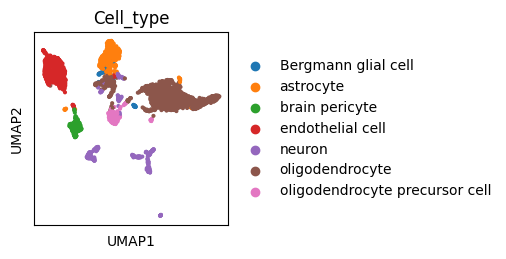

In [7]:
with rc_context({'figure.figsize': (2.5, 2.5)}):
    sc.pl.umap(sc_adata, color='Cell_type')

In [8]:
sc_adata_generate = model.pre_process(sc_data=generate_sc_data, 
                                      sc_meta=generate_sc_meta,
                                      is_normalized=True)

sc.pp.highly_variable_genes(sc_adata_generate, flavor="seurat_v3", n_top_genes=2000)
sc_adata_generate = sc_adata_generate[:, sc_adata_generate.var.highly_variable]
sc.pp.scale(sc_adata_generate, max_value=10)
sc.tl.pca(sc_adata_generate, svd_solver='arpack')
sc.pp.neighbors(sc_adata_generate)
sc.tl.umap(sc_adata_generate)

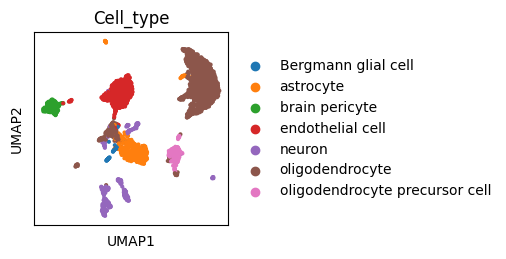

In [9]:
with rc_context({'figure.figsize': (2.5, 2.5)}):
    sc.pl.umap(sc_adata_generate, color='Cell_type')

In [10]:
adata_concat = sc_adata.concatenate(sc_adata_generate, batch_categories=['real', 'generate'])
sc.tl.pca(adata_concat)
# sc.external.pp.bbknn(adata_concat, batch_key='batch')  # running bbknn 1.3.6
sc.pp.neighbors(adata_concat)
sc.tl.umap(adata_concat)

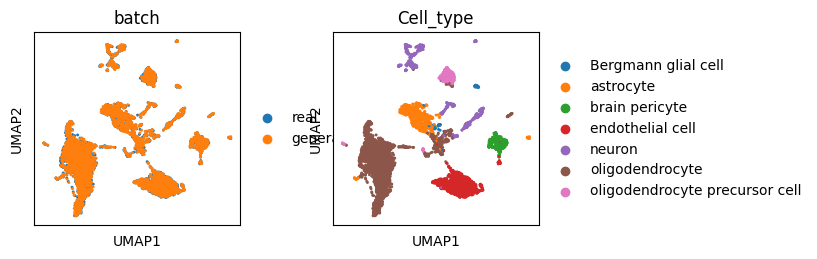

In [11]:
with rc_context({'figure.figsize': (2.5, 2.5)}):
    sc.pl.umap(adata_concat, color=['batch', 'Cell_type'])

generating spatial coordinates of single cells...
generating spatial patterns of totally 7 cell types...
generating spot-based ST data with 5 cells per spot...
generating with the spot layout and neighborhood structure of Visium (hex)...
generating with whole genes...
generating spatial coordinates of single cells...
generating spatial patterns of totally 7 cell types...
generating spot-based ST data with 5 cells per spot...
generating with the spot layout and neighborhood structure of Visium (hex)...
generating with whole genes...
generating spatial coordinates of single cells...
generating spatial patterns of totally 7 cell types...
generating spot-based ST data with 5 cells per spot...
generating with the spot layout and neighborhood structure of Visium (hex)...
generating with whole genes...
generating spatial coordinates of single cells...
generating spatial patterns of totally 7 cell types...
generating spot-based ST data with 5 cells per spot...
generating with the spot layout a

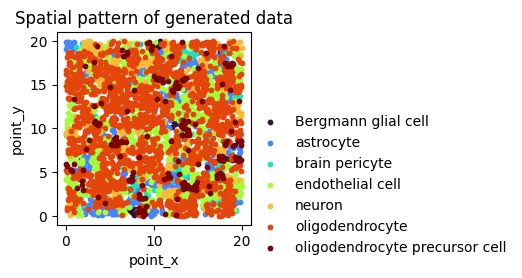

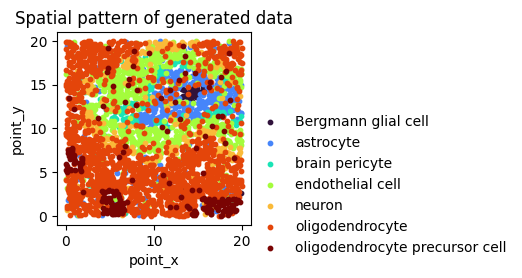

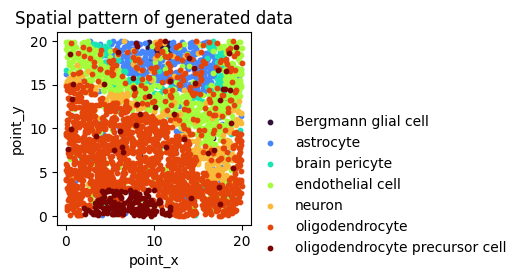

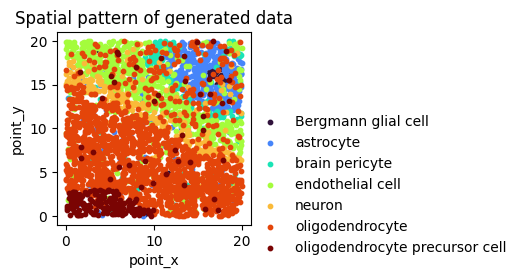

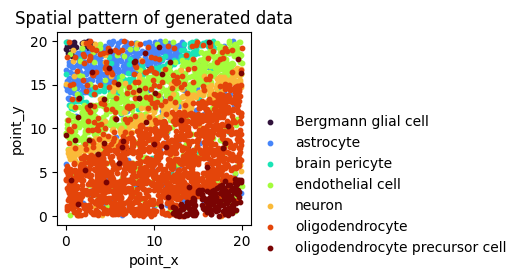

In [12]:
# delta
for delta_value in [1, 5, 10, 20, 50]:
    _, generate_sc_meta_new, _, _, _ = model.generate_spatial_data_random(
    generate_sc_data=generate_sc_data,
    generate_sc_meta=generate_sc_meta,
    set_seed=True,
    seed=12345,
    spatial_cell_type=None,
    spatial_dim=2,
    spatial_size=20,
    delta=delta_value,
    lamda=0.75,
    is_spot=True,
    platform='Visium',
    gene_type='whole',
    min_cell=10,
    n_gene=None,
    n_cell=5
    )
    
    plot_spatial_pattern_scatter(
        obj=generate_sc_meta_new,
        figwidth=2.5,
        figheight=2.5,
        dim=2,
        x="point_x",
        y="point_y",
        label='Cell_type',
        colormap='turbo',
        size=10,
        alpha=1)
plt.show()

generating spatial coordinates of single cells...
generating spatial patterns of totally 7 cell types...
generating spot-based ST data with 5 cells per spot...
generating with the spot layout and neighborhood structure of Visium (hex)...
generating with whole genes...
generating spatial coordinates of single cells...
generating spatial patterns of totally 7 cell types...
generating spot-based ST data with 5 cells per spot...
generating with the spot layout and neighborhood structure of Visium (hex)...
generating with whole genes...
generating spatial coordinates of single cells...
generating spatial patterns of totally 7 cell types...
generating spot-based ST data with 5 cells per spot...
generating with the spot layout and neighborhood structure of Visium (hex)...
generating with whole genes...
generating spatial coordinates of single cells...
generating spatial patterns of totally 7 cell types...
generating spot-based ST data with 5 cells per spot...
generating with the spot layout a

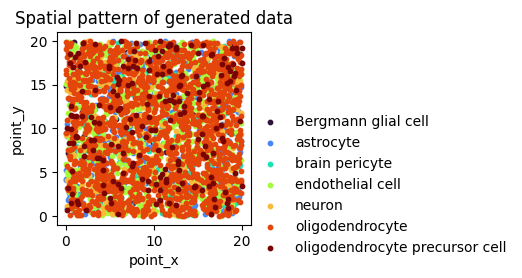

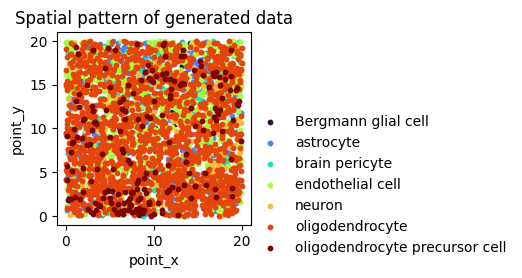

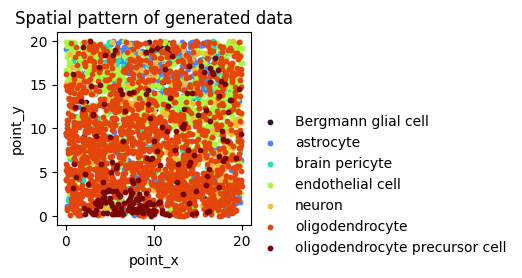

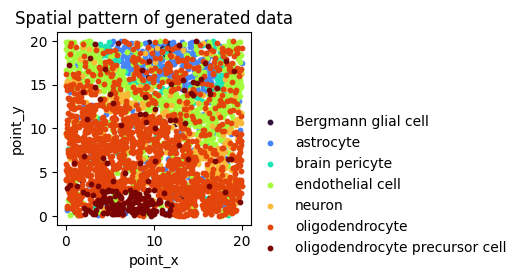

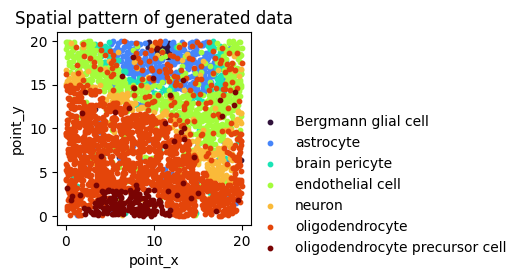

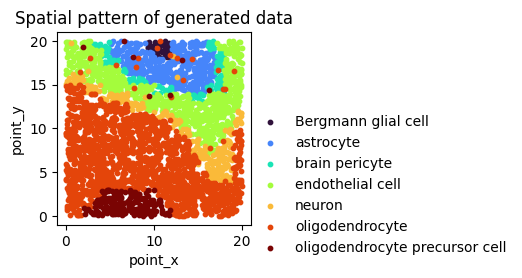

In [13]:
# lamda
for lamda_value in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    _, generate_sc_meta_new, _, _, _ = model.generate_spatial_data_random(
    generate_sc_data=generate_sc_data,
    generate_sc_meta=generate_sc_meta,
    set_seed=True,
    seed=12345,
    spatial_cell_type=None,
    spatial_dim=2,
    spatial_size=20,
    delta=10,
    lamda=lamda_value,
    is_spot=True,
    platform='Visium',
    gene_type='whole',
    min_cell=10,
    n_gene=None,
    n_cell=5
    )
    
    plot_spatial_pattern_scatter(
        obj=generate_sc_meta_new,
        figwidth=2.5,
        figheight=2.5,
        dim=2,
        x="point_x",
        y="point_y",
        label='Cell_type',
        colormap='turbo',
        size=10,
        alpha=1)
plt.show()